<a href="https://colab.research.google.com/github/Rhitabrat/deep-learning-CS510/blob/main/hw3/part_1_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 3

In [13]:
import tensorflow as tf 
from tensorflow.keras.applications import VGG16
from tensorflow import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
(X_train_ori, y_train), (X_test_ori, y_test) = keras.datasets.mnist.load_data()
assert X_train_ori.shape == (60000, 28, 28)
assert X_test_ori.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
def select_data(n, X_train, y_train):
    classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    indices_all_classes = []

    for each_class in classes:
        indices = [i for i, x in enumerate(y_train) if x == each_class]
        indices_all_classes.append(indices)

    new_X_train = []
    new_y_train = []

    for class_indices in indices_all_classes:
        x, y = X_train[class_indices[:n]], y_train[class_indices[:n]]
        new_X_train.extend(x)
        new_y_train.extend(y)

    return new_X_train, new_y_train

In [4]:
def prepare_data(X_train, y_train):
    X_train = np.expand_dims(X_train, axis=-1)
    X_train = np.repeat(X_train, 3, axis=-1)
    X_train = X_train.astype('float32') / 255
    X_train = tf.image.resize(X_train, [224, 224])
    y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)
    return X_train, y_train

In [5]:
def shuffle_data(X_train, y_train, N):
    indices = tf.range(start=0, limit=10*N, dtype=tf.int32)
    shuffled_indices = tf.random.shuffle(indices)

    shuffled_x = tf.gather(X_train, shuffled_indices)
    shuffled_y = tf.gather(y_train, shuffled_indices)
    return shuffled_x, shuffled_y

In [6]:
# 10x10 data - 10 from each category

N=10
X_train_10, y_train_10 = select_data(N, X_train_ori, y_train)
X_train_10, y_train_10 = prepare_data(X_train_10, y_train_10)
X_train_10, y_train_10 = shuffle_data(X_train_10, y_train_10, N)

In [7]:
N=30
X_train_30, y_train_30 = select_data(N, X_train_ori, y_train)
X_train_30, y_train_30 = prepare_data(X_train_30, y_train_30)
X_train_30, y_train_30 = shuffle_data(X_train_30, y_train_30, N)

In [8]:
N=50
X_train_50, y_train_50 = select_data(N, X_train_ori, y_train)
X_train_50, y_train_50 = prepare_data(X_train_50, y_train_50)
X_train_50, y_train_50 = shuffle_data(X_train_50, y_train_50, N)

In [9]:
N=70
X_train_70, y_train_70 = select_data(N, X_train_ori, y_train)
X_train_70, y_train_70 = prepare_data(X_train_70, y_train_70)
X_train_70, y_train_70 = shuffle_data(X_train_70, y_train_70, N)

In [10]:
N=90
X_train_90, y_train_90 = select_data(N, X_train_ori, y_train)
X_train_90, y_train_90 = prepare_data(X_train_90, y_train_90)
X_train_90, y_train_90 = shuffle_data(X_train_90, y_train_90, N)

In [11]:
X_test, y_test = prepare_data(X_test_ori, y_test)

In [14]:
vgg_model = VGG16(weights="imagenet", 
                        include_top=False)

vgg_model.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [15]:
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
        
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [16]:
# inputs = keras.Input(shape=(224, 224, 3))

# # Separately from setting trainable on the model, we set training to False 
# x = model(inputs, training=False)
# x = keras.layers.GlobalAveragePooling2D()(x)
# # x = keras.layers.Flatten()(x)

# outputs = keras.layers.Dense(10, activation="relu")(x)

# model = keras.Model(inputs, outputs)


model = keras.models.Sequential()
model.add(keras.Input(shape=(224, 224, 3)))
model.add(vgg_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 10)                250890    
                                                                 
Total params: 14,965,578
Trainable params: 250,890
Non-trainable params: 14,714,688
_________________________________________________________________


In [18]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.CategoricalCrossentropy(name="categorial_loss"),
              metrics=["accuracy"])

In [19]:
# exp-1
history = model.fit(X_train_10, y_train_10, 
          steps_per_epoch=8, 
          validation_split=0.2,
          epochs=10)

Epoch 1/10
8/8 [==============================] - 11s 170ms/step - loss: 2.9208 - accuracy: 0.2250 - val_loss: 1.5535 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 47ms/step - loss: 1.0312 - accuracy: 0.7375 - val_loss: 0.7717 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 0s 47ms/step - loss: 0.3608 - accuracy: 0.9125 - val_loss: 0.4115 - val_accuracy: 0.8500
Epoch 4/10
8/8 [==============================] - 0s 47ms/step - loss: 0.1482 - accuracy: 0.9875 - val_loss: 0.3146 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 0s 47ms/step - loss: 0.0434 - accuracy: 1.0000 - val_loss: 0.3479 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 0s 47ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 0.2782 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 0s 47ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.1862 - val_accuracy: 0.9500
Epoch 8/10
8/8 [=========

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 27s 84ms/step - loss: 0.4055 - accuracy: 0.8825


[0.405479371547699, 0.8824999928474426]

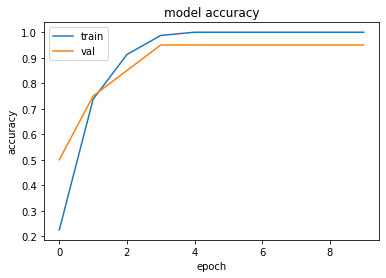

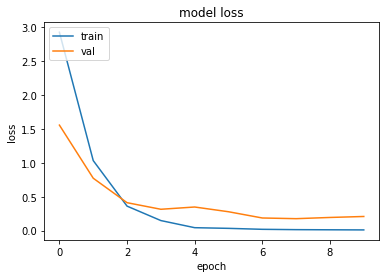

In [21]:
plot_acc(history)
plot_loss(history)

In [ ]:
# exp-2
history = model.fit(X_train_30, y_train_30, 
          steps_per_epoch=8, 
          validation_split=0.2,
          epochs=10)

Epoch 1/10
8/8 [==============================] - 1s 113ms/step - loss: 0.5984 - accuracy: 0.8250 - val_loss: 0.9601 - val_accuracy: 0.7667
Epoch 2/10
8/8 [==============================] - 1s 77ms/step - loss: 0.5225 - accuracy: 0.8458 - val_loss: 0.7009 - val_accuracy: 0.8333
Epoch 3/10
8/8 [==============================] - 1s 75ms/step - loss: 0.4899 - accuracy: 0.8792 - val_loss: 0.6002 - val_accuracy: 0.8500
Epoch 4/10
8/8 [==============================] - 1s 78ms/step - loss: 0.3832 - accuracy: 0.8792 - val_loss: 0.8157 - val_accuracy: 0.7500
Epoch 5/10
8/8 [==============================] - 1s 77ms/step - loss: 0.2703 - accuracy: 0.9417 - val_loss: 0.7174 - val_accuracy: 0.8333
Epoch 6/10
8/8 [==============================] - 1s 78ms/step - loss: 0.2791 - accuracy: 0.9250 - val_loss: 0.6645 - val_accuracy: 0.8500
Epoch 7/10
8/8 [==============================] - 1s 77ms/step - loss: 0.2362 - accuracy: 0.9417 - val_loss: 0.3891 - val_accuracy: 0.8333
Epoch 8/10
8/8 [==========

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 19s 59ms/step - loss: 0.5291 - accuracy: 0.8335


[0.5290769338607788, 0.8335000276565552]

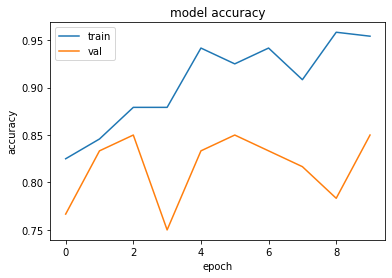

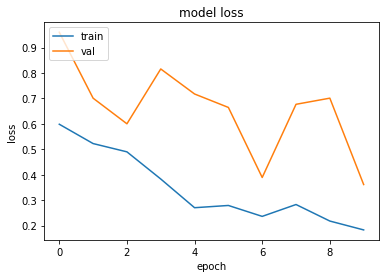

In [ ]:
plot_acc(history)
plot_loss(history)

In [ ]:
# exp-3
history = model.fit(X_train_50, y_train_50, 
          steps_per_epoch=8, 
          validation_split=0.2,
          epochs=10)

Epoch 1/10
8/8 [==============================] - 3s 139ms/step - loss: 0.3621 - accuracy: 0.8925 - val_loss: 0.2605 - val_accuracy: 0.9200
Epoch 2/10
8/8 [==============================] - 1s 116ms/step - loss: 0.3353 - accuracy: 0.9100 - val_loss: 0.3308 - val_accuracy: 0.8800
Epoch 3/10
8/8 [==============================] - 1s 116ms/step - loss: 0.2971 - accuracy: 0.9250 - val_loss: 0.2879 - val_accuracy: 0.9300
Epoch 4/10
8/8 [==============================] - 1s 117ms/step - loss: 0.2677 - accuracy: 0.9325 - val_loss: 0.3106 - val_accuracy: 0.9200
Epoch 5/10
8/8 [==============================] - 1s 119ms/step - loss: 0.2224 - accuracy: 0.9525 - val_loss: 0.2428 - val_accuracy: 0.9100
Epoch 6/10
8/8 [==============================] - 1s 119ms/step - loss: 0.2075 - accuracy: 0.9550 - val_loss: 0.2499 - val_accuracy: 0.9400
Epoch 7/10
8/8 [==============================] - 1s 122ms/step - loss: 0.2036 - accuracy: 0.9500 - val_loss: 0.2425 - val_accuracy: 0.9100
Epoch 8/10
8/8 [====

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 19s 59ms/step - loss: 0.3782 - accuracy: 0.8888


[0.37822937965393066, 0.8888000249862671]

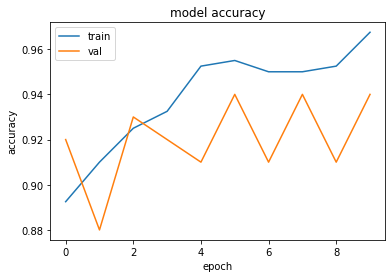

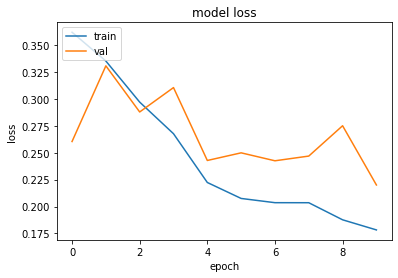

In [ ]:
plot_acc(history)
plot_loss(history)

In [ ]:
# exp-4
history = model.fit(X_train_70, y_train_70, 
          steps_per_epoch=8, 
          validation_split=0.2,
          epochs=10)

Epoch 1/10
8/8 [==============================] - 2s 188ms/step - loss: 0.2091 - accuracy: 0.9482 - val_loss: 0.2835 - val_accuracy: 0.9286
Epoch 2/10
8/8 [==============================] - 1s 153ms/step - loss: 0.2067 - accuracy: 0.9554 - val_loss: 0.3369 - val_accuracy: 0.9071
Epoch 3/10
8/8 [==============================] - 1s 153ms/step - loss: 0.1996 - accuracy: 0.9589 - val_loss: 0.3132 - val_accuracy: 0.9214
Epoch 4/10
8/8 [==============================] - 1s 152ms/step - loss: 0.1774 - accuracy: 0.9607 - val_loss: 0.3239 - val_accuracy: 0.9286
Epoch 5/10
8/8 [==============================] - 1s 155ms/step - loss: 0.1968 - accuracy: 0.9446 - val_loss: 0.2948 - val_accuracy: 0.9357
Epoch 6/10
8/8 [==============================] - 1s 155ms/step - loss: 0.1820 - accuracy: 0.9625 - val_loss: 0.3486 - val_accuracy: 0.9071
Epoch 7/10
8/8 [==============================] - 1s 159ms/step - loss: 0.1655 - accuracy: 0.9714 - val_loss: 0.2822 - val_accuracy: 0.9357
Epoch 8/10
8/8 [====

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 19s 59ms/step - loss: 0.3190 - accuracy: 0.9070


[0.31895437836647034, 0.9070000052452087]

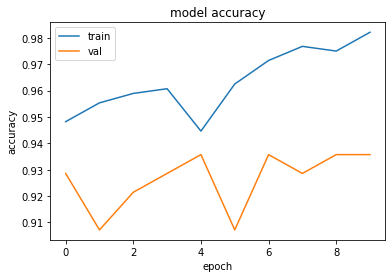

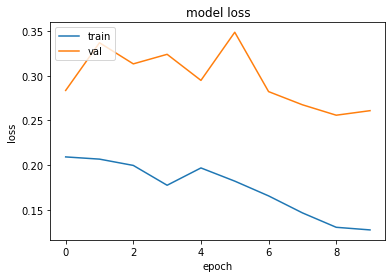

In [ ]:
plot_acc(history)
plot_loss(history)

In [ ]:
# exp-5
history = model.fit(X_train_90, y_train_90,
          steps_per_epoch=8, 
          validation_split=0.2,
          epochs=10)

Epoch 1/10
8/8 [==============================] - 2s 204ms/step - loss: 0.2046 - accuracy: 0.9500 - val_loss: 0.1967 - val_accuracy: 0.9500
Epoch 2/10
8/8 [==============================] - 1s 189ms/step - loss: 0.1839 - accuracy: 0.9597 - val_loss: 0.2023 - val_accuracy: 0.9500
Epoch 3/10
8/8 [==============================] - 1s 188ms/step - loss: 0.1845 - accuracy: 0.9500 - val_loss: 0.2238 - val_accuracy: 0.9389
Epoch 4/10
8/8 [==============================] - 2s 195ms/step - loss: 0.1702 - accuracy: 0.9625 - val_loss: 0.2247 - val_accuracy: 0.9389
Epoch 5/10
8/8 [==============================] - 2s 195ms/step - loss: 0.1676 - accuracy: 0.9597 - val_loss: 0.2364 - val_accuracy: 0.9444
Epoch 6/10
8/8 [==============================] - 2s 194ms/step - loss: 0.1707 - accuracy: 0.9667 - val_loss: 0.2120 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 1s 193ms/step - loss: 0.1617 - accuracy: 0.9639 - val_loss: 0.1971 - val_accuracy: 0.9444
Epoch 8/10
8/8 [====

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 19s 59ms/step - loss: 0.2947 - accuracy: 0.9104


[0.2947070896625519, 0.9103999733924866]

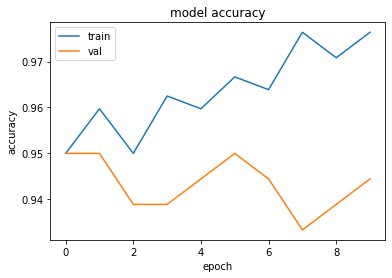

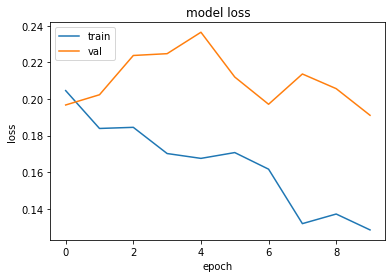

In [ ]:
plot_acc(history)
plot_loss(history)